In [1]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('task.csv', sep=';', decimal=',', na_values=['NA', 'N/A', '', ' ', 'NULL', 'null'])
df.head()

,Unnamed: 0,Country.Name,Country.Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",...,Urban population (% of total population),Urban population growth (annual %),"Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","Water productivity, total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal)",Women Business and the Law Index Score (scale 1-100),"Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)",Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
0,1,Afghanistan,AFG,1990,NaN,NaN,NaN,NaN,NaN,NaN,...,21.177,4.898023,NaN,NaN,NaN,NaN,25.625,NaN,NaN,NaN
1,2,Afghanistan,AFG,1991,NaN,NaN,NaN,NaN,NaN,NaN,...,21.266,7.319562,1.45,10.46,9.10,NaN,25.625,NaN,NaN,NaN
2,3,Afghanistan,AFG,1992,NaN,NaN,NaN,NaN,NaN,NaN,...,21.355,8.963742,1.45,10.27,8.95,NaN,25.625,NaN,NaN,NaN
3,4,Afghanistan,AFG,1993,NaN,NaN,NaN,NaN,NaN,NaN,...,21.444,9.206788,1.41,9.68,8.45,NaN,25.625,NaN,NaN,NaN
4,5,Afghanistan,AFG,1994,NaN,NaN,NaN,NaN,NaN,NaN,...,21.534,8.078605,1.36,9.01,7.88,NaN,25.625,NaN,NaN,NaN


In [2]:
var = pd.read_csv('vars.csv', sep=';')
data = df[['Country.Name', 'Year']].copy()
for col in var.iloc[16].drop('Var').values:
    data[col] = df[col].copy()
data.head()

,Country.Name,Year,Individuals using the Internet (% of population),"GNI, PPP (constant 2017 international $)","Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",Total reserves in months of imports,"Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",GNI per capita (constant 2010 US$),"Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)","Maternal mortality ratio (modeled estimate, per 100,000 live births)"
0,Afghanistan,1990,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1991,0.0,NaN,NaN,NaN,NaN,9.10,NaN,NaN,NaN
2,Afghanistan,1992,0.0,NaN,98.851645,NaN,NaN,8.95,NaN,NaN,NaN
3,Afghanistan,1993,0.0,NaN,NaN,NaN,NaN,8.45,NaN,NaN,NaN
4,Afghanistan,1994,0.0,NaN,NaN,NaN,NaN,7.88,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 11 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                 --------------  -----  
 0   Country.Name                                                                                                           6090 non-null   object 
 1   Year                                                                                                                   6090 non-null   int64  
 2   Individuals using the Internet (% of population)                                                                       5391 non-null   float64
 3   GNI, PPP (constant 2017 international $)                                                                               3570 non-null   float64
 4   

In [4]:
data.drop(
    columns = [
        'Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)', 
        'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)'
        ],
        inplace=True
        )

data = data[data.drop(columns = ['Country.Name', 'Year']).notna().sum(axis=1) >= 4]

In [5]:
data.shape

(4137, 9)

In [6]:
missing_data_per_country = data.groupby('Country.Name').apply(lambda x: x.isna().sum().sum()).sort_values(ascending=False)
missing_data_per_country.head(10)

/tmp/ipykernel_9906/125343956.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_data_per_country = data.groupby('Country.Name').apply(lambda x: x.isna().sum().sum()).sort_values(ascending=False)


Country.Name
Puerto Rico           61
Venezuela, RB         61
Iran, Islamic Rep.    61
Tunisia               60
Niger                 60
Senegal               57
Mali                  57
Togo                  57
Benin                 57
Burkina Faso          57
dtype: int64

In [7]:
missing_data_per_country.describe()

count    180.000000
mean      35.638889
std       11.212904
min        3.000000
25%       29.750000
50%       36.000000
75%       40.000000
max       61.000000
dtype: float64

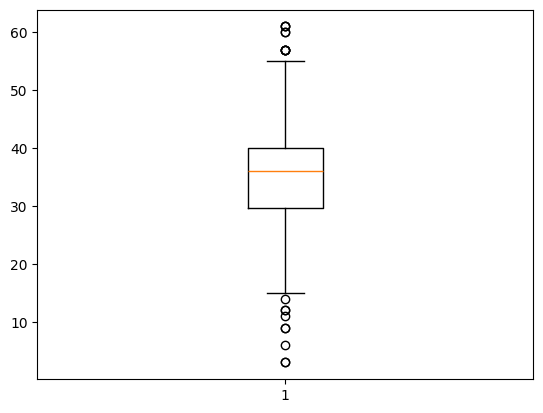

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(missing_data_per_country.values)
plt.show()

In [9]:
import numpy as np

def get_outliers(data:pd.Series):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    return data[data >1.5*IQR + Q3]
outliers = get_outliers(missing_data_per_country.values)
missing_data_per_country[missing_data_per_country.isin(outliers)]

Country.Name
Puerto Rico           61
Venezuela, RB         61
Iran, Islamic Rep.    61
Tunisia               60
Niger                 60
Senegal               57
Mali                  57
Togo                  57
Benin                 57
Burkina Faso          57
dtype: int64

In [10]:
missing_data_per_country = missing_data_per_country[~np.isin(missing_data_per_country, outliers)]

In [11]:
missing_data_per_country.describe()

count    170.000000
mean      34.276471
std        9.967998
min        3.000000
25%       29.000000
50%       35.000000
75%       39.000000
max       55.000000
dtype: float64

In [12]:
data = data[data['Country.Name'].isin(missing_data_per_country.index)]
data.shape

(3864, 9)

In [13]:
data.drop(columns = ['Country.Name', 'Year']).isna().sum().sort_values()

Individuals using the Internet (% of population)                                     77
Wage and salaried workers, total (% of total employment) (modeled ILO estimate)      83
Total reserves in months of imports                                                 376
GNI per capita (constant 2010 US$)                                                  544
GNI, PPP (constant 2017 international $)                                            614
Maternal mortality ratio (modeled estimate, per 100,000 live births)               1061
Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)      3072
dtype: int64

In [14]:
y = data['Individuals using the Internet (% of population)'].copy()
X = data.drop('Individuals using the Internet (% of population)', axis=1).copy()

## Дослідження показника - Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)
----------------------------
Він показує відсоток прісної води, що використовується агросектором

In [15]:
sf_none_per_country = X.groupby('Country.Name')\
    ['Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)']\
        .apply(lambda x: x.isna().sum()).sort_values(ascending=False)

In [16]:
for country in sf_none_per_country.index:
    mask = X['Country.Name'] == country
    m = X.loc[mask, 'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)'].mean()
        
    if pd.isna(m):
        X = X[X['Country.Name'] != country].copy()
        
    X.loc[mask, 'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)'] = \
        X.loc[mask, 'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)'].fillna(m)

## Дослідження показника Maternal mortality ratio (modeled estimate, per 100,000 live births)
----------------------------------------
Він показує кількість жінок, які померли від причин, пов'язаних з вагітністю або пологами, на 100,000 живонароджень

In [17]:
import math

def fill_nulls_with_percentage_change(
    df, 
    feature_col='Maternal mortality ratio (modeled estimate, per 100,000 live births)', 
    year_col='Year', 
    country_col='Country.Name',
    inverce=False
    ):
    """
    Fill null values in a feature column based on mean percentage changes over years.
    Fills separately for each country.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The input dataframe
    feature_col : str
        Name of the feature column to fill nulls
    year_col : str
        Name of the year column
    country_col : str
        Name of the country column
    inverce : bool
        change order of operations
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with filled values
    """
    # Create a copy to avoid modifying original
    df_filled = df.copy()
    
    # Process each country separately
    result_dfs = []
    
    for country in df_filled[country_col].unique():
        country_df = df_filled[df_filled[country_col] == country].copy()
        
        # Sort by year to ensure correct order
        country_df = country_df.sort_values(year_col).reset_index(drop=True)
        
        # Step 1: Compute mean percentage change
        non_null_indices = country_df[feature_col].notna()
        non_null_values = country_df.loc[non_null_indices, feature_col].values
        
        if len(non_null_values) < 2:
            print(f"{country}: Not enough non-null values to compute percentage change")
            # result_dfs.append(country_df)
            continue
        
        # Calculate percentage changes between consecutive non-null values
        percentage_changes = []
        for i in range(1, len(non_null_values)):
            if non_null_values[i-1] != 0:  # Avoid division by zero
                pct_change = (non_null_values[i] - non_null_values[i-1]) / non_null_values[i-1]
                percentage_changes.append(pct_change)
        
        if not percentage_changes:
            print(f"{country}: Could not compute percentage changes")
            result_dfs.append(country_df)
            continue
        
        mean_pct_change = np.mean(percentage_changes)
        # print(f"{country} - Mean percentage change: {mean_pct_change:.4%}")
        
        # Step 2: Fill missing values at the END (2018)
        max_year = country_df[year_col].max()
        
        # Find the last non-null value
        last_non_null_idx = country_df[feature_col].last_valid_index()
        
        if last_non_null_idx is not None:
            last_non_null_year = country_df.loc[last_non_null_idx, year_col]
            
            # If there are null values after the last non-null value
            if last_non_null_year < max_year:
                unrounded_value = country_df.loc[last_non_null_idx, feature_col]
                
                for idx in range(last_non_null_idx + 1, len(country_df)):
                    if pd.isna(country_df.loc[idx, feature_col]):
                        # Apply percentage change (subtract means divide by (1 + pct))
                        if not inverce:
                            unrounded_value = unrounded_value * (1 - mean_pct_change)
                        else:
                            unrounded_value = unrounded_value * (1 + mean_pct_change)
                        # Store floored value
                        country_df.loc[idx, feature_col] = math.floor(unrounded_value)
        
        # Step 3: Fill missing values NOT at the end (middle years)
        null_indices = country_df[country_df[feature_col].isna()].index.tolist()
        
        for null_idx in null_indices:
            # Find the first non-null value AFTER this null
            next_non_null_idx = None
            for idx in range(null_idx + 1, len(country_df)):
                if pd.notna(country_df.loc[idx, feature_col]):
                    next_non_null_idx = idx
                    break
            
            if next_non_null_idx is not None:
                # Work backwards from the next non-null value
                unrounded_value = country_df.loc[next_non_null_idx, feature_col]
                
                # Calculate how many steps back we need to go
                steps_back = next_non_null_idx - null_idx
                
                # Apply percentage change going backwards
                for step in range(steps_back):
                    if not inverce:
                        unrounded_value = unrounded_value / (1 + mean_pct_change)
                    else:
                        unrounded_value = unrounded_value * (1 - mean_pct_change)
                
                # Store floored value
                country_df.loc[null_idx, feature_col] = math.floor(unrounded_value)
        
        result_dfs.append(country_df)
    
    # Combine all countries back together
    df_filled = pd.concat(result_dfs, ignore_index=True)
    
    return df_filled

In [18]:
X = fill_nulls_with_percentage_change(X)

Dominica: Not enough non-null values to compute percentage change


## Дослідження показника GNI, PPP (constant 2017 international $)
---------------------------------------------
Він показує валовий національний дохід, скоригований за паритетом купівельної спроможності у постійних цінах 2017 року в міжнародних доларах

#### GNI (Gross National Income)
Валовий національний дохід — це сума всіх доходів, які отримали резиденти країни (громадяни та компанії), незалежно від того, де вони працювали — всередині країни чи за кордоном. Це ВВП плюс чисті доходи з-за кордону.
#### PPP (Purchasing Power Parity)
Паритет купівельної спроможності — це коригування, яке враховує різницю в цінах між країнами. Наприклад, на 100 доларів у США можна купити менше товарів, ніж на ці самі 100 доларів в Україні або Індії. PPP вирівнює ці відмінності, показуючи реальну купівельну спроможність.
#### Constant 2017 international $

Постійні ціни 2017 року в міжнародних доларах означає, що дані очищені від інфляції (використовується базовий рік 2017). Це дозволяє порівнювати економічне зростання в часі без викривлення через зміну цін "Міжнародні долари" — це умовна валюта для порівнянь між країнами

In [19]:
pd.options.display.float_format = '{:.2f}'.format
X['GNI, PPP (constant 2017 international $)'] = X['GNI, PPP (constant 2017 international $)'] / 1e9
X['GNI, PPP (constant 2017 international $)'].describe()

count    3173.00
mean      675.66
std      1930.76
min         0.88
25%        30.33
50%       112.33
75%       459.03
max     21115.31
Name: GNI, PPP (constant 2017 international $), dtype: float64

In [20]:
gni17_none_per_country = X.groupby('Country.Name')\
    ['GNI, PPP (constant 2017 international $)']\
        .apply(lambda x: x.isna().sum()).sort_values(ascending=False)

In [21]:
for country in gni17_none_per_country.index:
    mask = X['Country.Name'] == country

    if X.loc[mask, 'GNI, PPP (constant 2017 international $)'].isna().sum() == 0: 
        continue

    m = X.loc[mask, 'GNI, PPP (constant 2017 international $)'].min()
        
    if pd.isna(m):
        X = X[X['Country.Name'] != country].copy()
        
    X.loc[mask, 'GNI, PPP (constant 2017 international $)'] = \
        X.loc[mask, 'GNI, PPP (constant 2017 international $)'].fillna(m)
    
X['GNI, PPP (constant 2017 international $)'].isna().sum()

np.int64(0)

## Дослідження показника GNI per capita (constant 2010 US$)
-------------------------------------------
це показник валового національного доходу на душу населення, виражений у постійних цінах 2010 року в доларах США

In [22]:
X = fill_nulls_with_percentage_change(
    df=X,
    feature_col='GNI per capita (constant 2010 US$)',
    inverce=True
)

Afghanistan: Not enough non-null values to compute percentage change
Antigua and Barbuda: Not enough non-null values to compute percentage change
Barbados: Not enough non-null values to compute percentage change
Ethiopia: Not enough non-null values to compute percentage change
Fiji: Not enough non-null values to compute percentage change
Grenada: Not enough non-null values to compute percentage change
Guyana: Not enough non-null values to compute percentage change
Iceland: Not enough non-null values to compute percentage change
Iraq: Not enough non-null values to compute percentage change
Libya: Not enough non-null values to compute percentage change
Maldives: Not enough non-null values to compute percentage change
Papua New Guinea: Not enough non-null values to compute percentage change
Qatar: Not enough non-null values to compute percentage change
Suriname: Not enough non-null values to compute percentage change
Switzerland: Not enough non-null values to compute percentage change
Tri

## Дослідження показника Total reserves in months of imports
------------------------------------------
Він показує на скільки місяців країна може оплатити свій імпорт товарів та послуг, використовуючи наявні міжнародні резерви

In [23]:
for country in sf_none_per_country.index:
    mask = X['Country.Name'] == country

    if X.loc[mask, 'Total reserves in months of imports'].isna().sum() == 0: 
        continue

    m = X.loc[mask, 'Total reserves in months of imports'].mean()
        
    if pd.isna(m):
        X = X[X['Country.Name'] != country].copy()
        
    X.loc[mask, 'Total reserves in months of imports'] = \
        X.loc[mask, 'Total reserves in months of imports'].fillna(m)
    
X['Total reserves in months of imports'].isna().sum()

np.int64(0)

## Дослідження показника Wage and salaried workers, total (% of total employment) (modeled ILO estimate)
----------------------------------
Він показує частку найманих працівників у загальній зайнятості, розрахована за моделлю Міжнародної організації праці (ILO)

In [24]:
X = fill_nulls_with_percentage_change(
    df=X,
    feature_col='Wage and salaried workers, total (% of total employment) (modeled ILO estimate)'
)

In [25]:
X.isna().sum()

Country.Name                                                                       0
Year                                                                               0
GNI, PPP (constant 2017 international $)                                           0
Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)      0
Total reserves in months of imports                                                0
Wage and salaried workers, total (% of total employment) (modeled ILO estimate)    0
GNI per capita (constant 2010 US$)                                                 0
Maternal mortality ratio (modeled estimate, per 100,000 live births)               0
dtype: int64

In [26]:
# Create tuples for comparison
data_tuples = data[['Country.Name', 'Year']].apply(tuple, axis=1)
X_tuples = set(X[['Country.Name', 'Year']].apply(tuple, axis=1))

# Create boolean mask
mask = data_tuples.isin(X_tuples)

# Get matching indexes
matching_indexes = data[mask].index
print(f"Found {len(matching_indexes)} matching rows")

Found 3330 matching rows


In [27]:
target = y[matching_indexes].copy().reset_index(drop=True)

mask = target.isna()
target_null = target[mask]
target_without_null = target[~mask]

X_null = X[mask]
X_without_null = X[~mask]


display(X.shape)
display(X_null.shape)
display(X_without_null.shape)
display(target.shape)
display(target_null.shape)
display(target_without_null.shape)

(3330, 8)

(73, 8)

(3257, 8)

(3330,)

(73,)

(3257,)

## Linear Regression

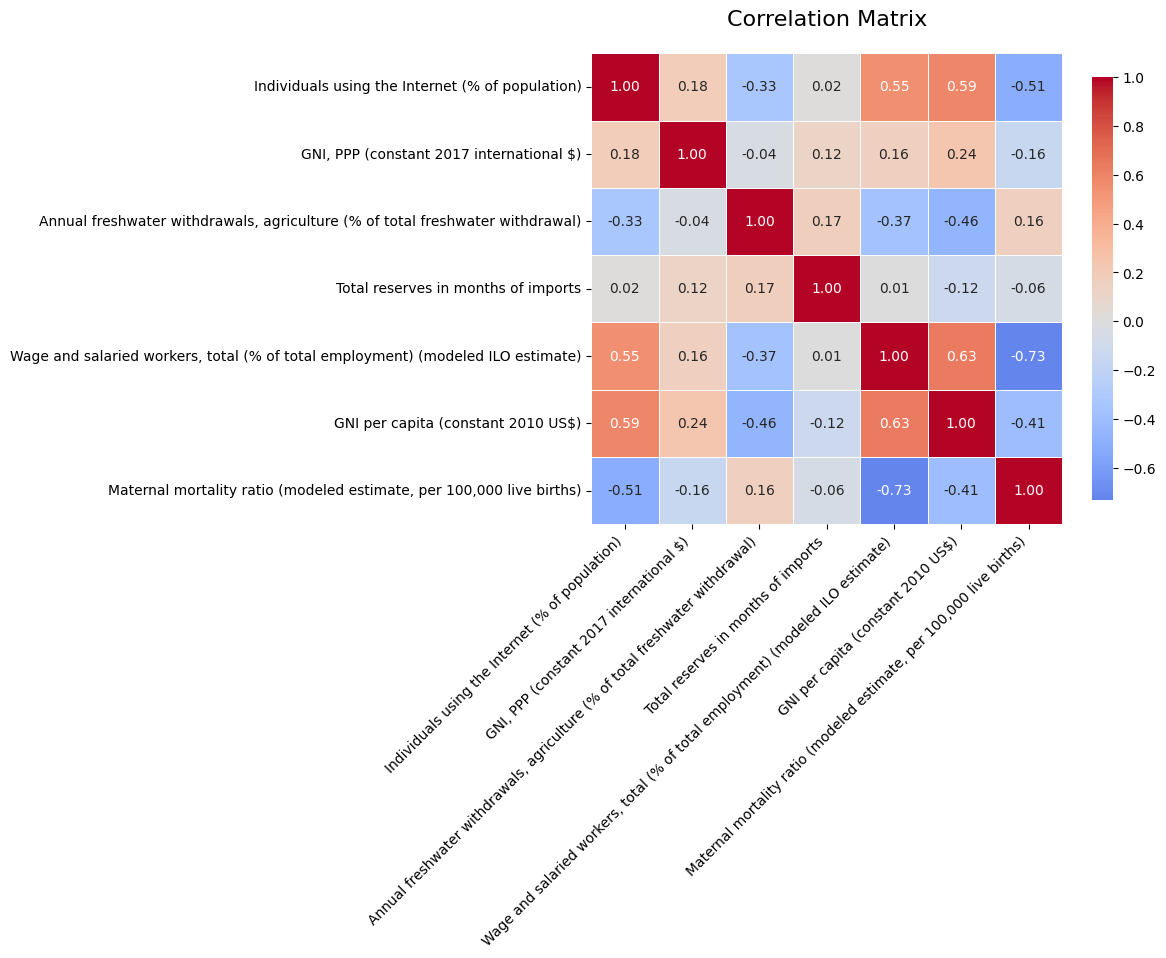

In [28]:
import seaborn as sns

correlation_matrix = data.drop(columns=['Country.Name', 'Year']).corr()

plt.figure(figsize=(12, 10))  # Larger figure size for better readability
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            fmt='.2f',            # Format numbers to 2 decimal places
            cmap='coolwarm',      # Color scheme (blue-red)
            center=0,             # Center colormap at 0
            square=True,          # Make cells square-shaped
            linewidths=0.5,       # Add gridlines
            cbar_kws={'shrink': 0.8})  # Adjust colorbar size

plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)                # Keep y-axis labels horizontal
plt.tight_layout()                    # Adjust layout to prevent label cutoff
plt.show()


In [29]:
models_best_score = []
best_models = []

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

ridge = Ridge(random_state=42, copy_X=True, tol=0.001)
params={
    'alpha':uniform(0.1,100)
}

rscv = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=params,
    n_jobs=-1,
    cv=20
)

search = rscv.fit(X_without_null.drop('Country.Name', axis=1), target_without_null)
models_best_score.append(search.best_score_)
best_models.append(rscv.best_estimator_)

In [31]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import KFold

# models_best_score = []
# best_models = []

# lrm = LinearRegression(positive=True)

# kf = KFold(n_splits=20, shuffle=True, random_state=42)
# m_scores = []
# r_scores = []

# for i, (train_index, test_index) in enumerate(kf.split(X_without_null)):
#     X_train, X_test = X_without_null.drop(columns = ['Country.Name']).iloc[train_index],\
#             X_without_null.drop(columns = ['Country.Name']).iloc[test_index]
#     y_train, y_test = target_without_null.iloc[train_index], target_without_null.iloc[test_index]
    
#     lrm.fit(X_train, y_train)
#     predict = lrm.predict(X_test)
#     m = mean_squared_error(y_test, predict)
#     r = lrm.score(X_test, y_test)
#     m_scores.append(m)
#     r_scores.append(r)

# print(f'Mean of mean squared error across 10 folds - {np.mean(m_scores)}')
# print(f'Mean of R^2 across 10 folds - {np.mean(r_scores)}')

# models_best_score.append(np.mean(r_scores))
# best_models.append(lrm)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

rfr = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True)
params = {
    'n_estimators':randint(5, 50),
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 29),
    'min_samples_leaf': randint(1,50),
    'min_impurity_decrease': uniform(0.01, 0.51)
}

rscv = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=params,
    n_jobs=-1,
    cv=20
)
search = rscv.fit(X_without_null.drop(columns=["Country.Name"]), target_without_null)

print(f'Best score for Random Forest Regressor - {search.best_score_}')
print(f'Best parameters for Random Forest Regressor - {search.best_params_}')

models_best_score.append(search.best_score_)
best_models.append(search.best_estimator_)


/home/nykfer/projects/data-science/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/nykfer/projects/data-science/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/nykfer/projects/data-science/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/nykfer/projects/data-science/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/nykfer/projects/data-s

Best score for Random Forest Regressor - 0.8993292964497785
Best parameters for Random Forest Regressor - {'max_depth': 11, 'min_impurity_decrease': np.float64(0.13807685507803188), 'min_samples_leaf': 16, 'min_samples_split': 23, 'n_estimators': 22}


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_without_null.drop(columns=['Country.Name']), 
    target_without_null,
    test_size=0.3)

rfr = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True, **search.best_params_)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)


0.9316440035316461

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

nn = MLPRegressor(
    random_state=42,
    activation='relu'
    )

params = {
    'model__solver': ['sgd', 'adam'],
    'model__alpha': uniform(0.0001, 0.1),
    'model__momentum': uniform(0.1, 0.9),
    'model__nesterovs_momentum': [True, False],
    'model__hidden_layer_sizes':[
        (12, 6, 3),      # Your specific architecture
        (20, 10, 5),        # Alternative 1
        (30, 15, 7, 3),     # Alternative 2
        (50, 43, 17, 5),              # Simple single layer
        (25, 12, 6)         # Alternative 3
    ]
}

pipe = Pipeline(
    [('scaler', MinMaxScaler()),
    ('model', nn)
    ]
)

rscv = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=params,
    n_jobs=-1,
    cv=20
)
search = rscv.fit(X_without_null.drop(columns=["Country.Name"]), target_without_null)

print(f'Best score for Neural Network - {search.best_score_}')
print(f'Best parameters for Neural Network - {search.best_params_}')

models_best_score.append(search.best_score_)
best_models.append(search.best_estimator_)

/home/nykfer/projects/data-science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nykfer/projects/data-science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nykfer/projects/data-science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nykfer/projects/data-science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Best score for Neural Network - 0.903089236973978
Best parameters for Neural Network - {'model__alpha': np.float64(0.02757202282937995), 'model__hidden_layer_sizes': (50, 43, 17, 5), 'model__momentum': np.float64(0.17548169003136344), 'model__nesterovs_momentum': False, 'model__solver': 'adam'}


/home/nykfer/projects/data-science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


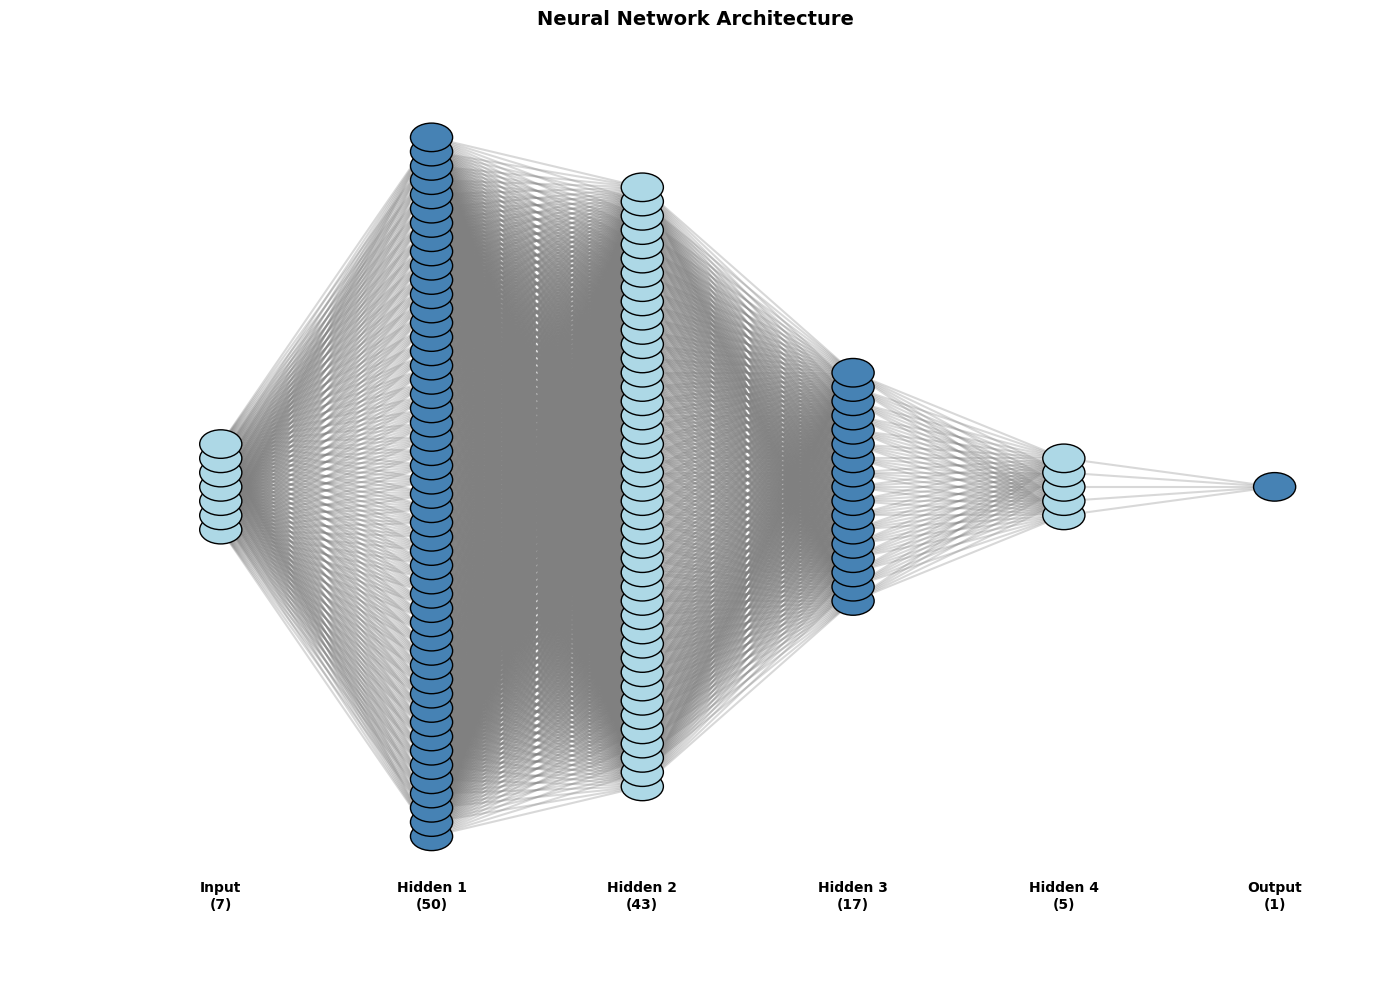

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_neural_network(model, feature_names=None):
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Get architecture
    n_inputs = model.n_features_in_
    hidden_layers = model.hidden_layer_sizes if isinstance(model.hidden_layer_sizes, tuple) else (model.hidden_layer_sizes,)
    n_outputs = model.n_outputs_
    
    layers = [n_inputs] + list(hidden_layers) + [n_outputs]
    max_neurons = max(layers)
    
    # Define colors for layers (alternating light and dark)
    colors = ['lightblue', 'steelblue']
    
    # Draw neurons
    for i, layer_size in enumerate(layers):
        layer_name = f"Input\n({layer_size})" if i == 0 else \
                     f"Output\n({layer_size})" if i == len(layers)-1 else \
                     f"Hidden {i}\n({layer_size})"
        
        # Alternate colors
        color = colors[i % 2]
        
        x = i / (len(layers) - 1)
        for j in range(layer_size):
            y = (j + (max_neurons - layer_size) / 2) / max_neurons
            circle = mpatches.Circle((x, y), 0.02, color=color, ec='black', zorder=2)
            ax.add_patch(circle)
            
            # Add feature names for input layer
            if i == 0 and feature_names is not None and j < len(feature_names):
                ax.text(x - 0.08, y, feature_names[j], ha='right', va='center', 
                       fontsize=8, style='italic')
            
            # Draw connections to next layer
            if i < len(layers) - 1:
                for k in range(layers[i + 1]):
                    y_next = (k + (max_neurons - layers[i + 1]) / 2) / max_neurons
                    x_next = (i + 1) / (len(layers) - 1)
                    ax.plot([x, x_next], [y, y_next], 'gray', alpha=0.3, zorder=1)
        
        # Add layer label
        ax.text(x, -0.1, layer_name, ha='center', fontsize=10, weight='bold')
    
    ax.set_xlim(-0.2, 1.1)
    ax.set_ylim(-0.2, 1.1)
    ax.axis('off')
    ax.set_title('Neural Network Architecture', fontsize=14, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()

# Use it after fitting
best_nn = search.best_estimator_.named_steps['model']
plot_neural_network(best_nn)

## Graph with models' best scores

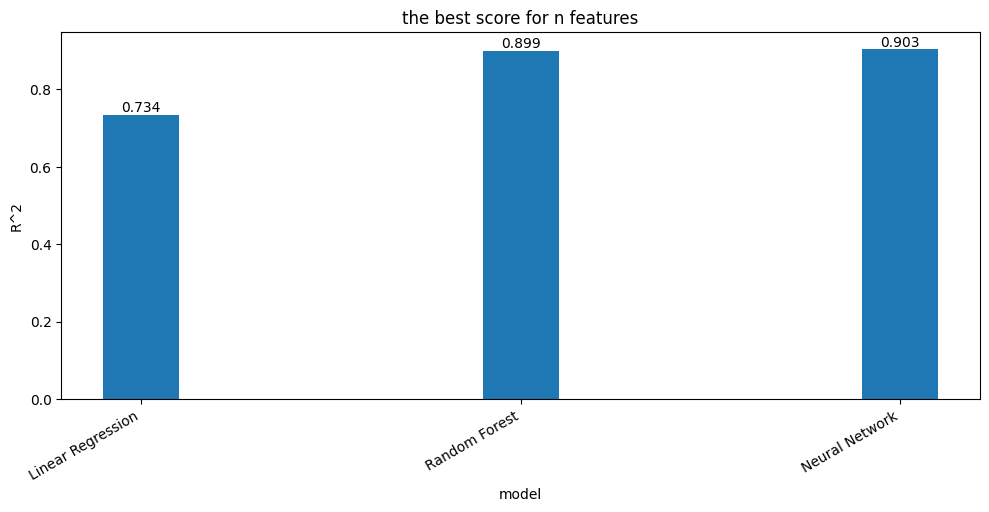

In [36]:
xs = ['Linear Regression', 'Random Forest', 'Neural Network']

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(xs, models_best_score, width=0.2)
ax.set_ylabel('R^2')
ax.set_xlabel('model')

for i, s in enumerate(models_best_score):
    ax.text(xs[i], s, str(round(s, 3)), ha='center', va='bottom')

fig.autofmt_xdate()
plt.tight_layout()
plt.title('the best score for n features')
plt.show()

In [37]:
scaler = best_models[2].named_steps['scaler']

target_null_lrm = best_models[0].predict(X_null.drop('Country.Name', axis=1))
target_null_rfr = best_models[1].predict(X_null.drop('Country.Name',axis=1))
target_null_nn = best_models[2].named_steps['model'].predict(scaler.transform(X_null.drop('Country.Name',axis=1)))

df_filled = pd.DataFrame({
    'lrm': target_null_lrm,
    'rfr': target_null_rfr,
    'nn': target_null_nn
})

df_filled = pd.concat([
    X_null.reset_index(drop=True), 
    df_filled.reset_index(drop=True)
], axis=1)
df_filled.head()


,Country.Name,Year,"GNI, PPP (constant 2017 international $)","Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",Total reserves in months of imports,"Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",GNI per capita (constant 2010 US$),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",lrm,rfr,nn
0,Albania,2018,38.27,53.27,6.37,44.52,5069.30,15.00,43.91,69.10,60.21
1,Angola,2018,195.95,26.16,5.41,21.62,2982.81,257.00,37.18,20.52,21.97
2,Argentina,2018,974.25,73.10,7.12,74.47,9662.77,40.00,55.90,58.33,66.94
3,Australia,2002,761.48,68.36,2.34,79.66,44670.39,6.00,41.41,47.68,32.43
4,Australia,2003,783.44,64.19,2.94,80.13,45394.77,6.00,44.38,52.39,39.40


In [38]:
for country in np.unique(df_filled['Country.Name'].values):
    sub_df = df_filled[df_filled['Country.Name'] == country]

    if len(sub_df)>=2:
        print(f'Country - {country}')
        print(sub_df[['Year','lrm', 'rfr', 'nn']])
        print('='*100)

Country - Australia
   Year   lrm   rfr    nn
3  2002 41.41 47.68 32.43
4  2003 44.38 52.39 39.40
5  2004 47.50 62.73 44.84
6  2018 85.75 91.64 90.30
Country - Bangladesh
   Year    lrm   rfr    nn
7  1996 -12.30  0.30 -0.38
8  2017  37.44 22.41 28.81
9  2018  40.11 18.41 30.85
Country - Belarus
    Year   lrm   rfr    nn
10  2003 25.73 18.65 10.80
11  2004 28.30 22.64 13.31
12  2005 30.82 27.19 16.44
Country - Bhutan
    Year   lrm   rfr    nn
14  2017 34.01 23.27 36.28
15  2018 36.46 23.06 37.79
Country - Cameroon
    Year    lrm   rfr    nn
20  1996 -14.96  0.30 -0.38
21  2018  37.28 19.20 11.60
Country - Ecuador
    Year   lrm   rfr    nn
27  2017 43.26 50.16 46.50
28  2018 45.33 48.14 49.33
Country - Kyrgyz Republic
    Year   lrm   rfr    nn
37  1996 -7.29  0.30 -0.38
38  1997 -5.65  0.30 -0.26
39  2018 47.48 33.01 40.17
Country - Madagascar
    Year   lrm  rfr    nn
42  2017 28.21 8.33 15.85
43  2018 30.76 8.33 17.20
Country - Mauritania
    Year   lrm   rfr    nn
45  1996 -9.52

## І лінійга регресія і нейронна мережа (з виокристанням Scikit-learn) є поганим вибором для побудови моделі, через можливість отримання негативних значень для цільової змінної, чого бути не може так, як цільова змінна відображає відсотки